In [16]:
import numpy as np
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import json

In [7]:
def toggle(x):

    k_m0_L = 3.20e-2  
    k_m0_T = 1.19e-1  
    k_m_L = 8.30
    k_m_T = 2.06
    k_p_L = 9.726e-1  
    k_p_T = 9.726e-1  
    g_m_L = 1.386e-1
    g_m_T = 1.386e-1
    g_p_L = 1.65e-2
    g_p_T = 1.65e-2
    theta_LacI = 31.94
    theta_TetR = 30.00
    theta_IPTG = 9.06e-2
    theta_aTc = 11.65
    eta_LacI = 2.00
    eta_TetR = 2.00
    eta_IPTG = 2.00
    eta_aTc = 2.00

    return [
        k_m0_L + k_m_L*(1 / (1 + ((x[3]/theta_TetR) * (1 / (1 + (v_1/theta_aTc)**eta_aTc)))**eta_TetR)) - g_m_L * x[0], 
        k_m0_T + k_m_T*(1 / (1 + ((x[2]/theta_LacI) * (1 / (1 + (v_2/theta_IPTG)**eta_IPTG)))**eta_LacI)) - g_m_T * x[1],
        k_p_L * x[0] - g_p_L * x[2], 
        k_p_T * x[1] - g_p_T * x[3]
    ]

### Equilibria points
Compute equilibria points.

In [60]:
equilibria = np.empty((4, 4))

for i in range(4):
    match i:
        case 0:
            v_1 = 0
            v_2 = 0
        case 1:
            v_1 = 35
            v_2 = 0
        case 2:
            v_1 = 0
            v_2 = 0.35
        case 3:
            v_1 = 35
            v_2 = 0.35

    equilibria[i, :] = fsolve(toggle, [0, 0, 0, 0])

In [66]:
title = np.array([
    '#### Equilibrium point with zero inducers concentration',
    '#### Equilibrium point with maximum aTc concentration',
    '#### Equilibrium point with maximum IPTG concentration',
    '#### Equilibrium point with maximum aTc and IPTG concentrations'
])

display(Markdown(title[0]))

mRNA_LacI = equilibria[0, 0]
mRNA_TetR = equilibria[0, 1]
LacI = equilibria[0, 2]
TetR = equilibria[0, 3]

msg = """
<center>

| **mRNA LacI** | **mRNA TetR** | **LacI** | **TetR** |
|---------------|---------------|----------|----------|
| {mRNA_LacI}   | {mRNA_TetR}   | {LacI}   | {TetR}   |
""".format(mRNA_LacI = "{:.2f}".format(mRNA_LacI), mRNA_TetR = "{:.2f}".format(mRNA_TetR), LacI = "{:.2f}".format(LacI), TetR = "{:.2f}".format(TetR))

display(Markdown(msg))

display(Markdown(title[1]))

mRNA_LacI = equilibria[1, 0]
mRNA_TetR = equilibria[1, 1]
LacI = equilibria[1, 2]
TetR = equilibria[1, 3]

msg = """
<center>

| **mRNA LacI** | **mRNA TetR** | **LacI** | **TetR** |
|---------------|---------------|----------|----------|
| {mRNA_LacI}   | {mRNA_TetR}   | {LacI}   | {TetR}   |
""".format(mRNA_LacI = "{:.2f}".format(mRNA_LacI), mRNA_TetR = "{:.2f}".format(mRNA_TetR), LacI = "{:.2f}".format(LacI), TetR = "{:.2f}".format(TetR))

display(Markdown(msg))

display(Markdown(title[2]))

mRNA_LacI = equilibria[2, 0]
mRNA_TetR = equilibria[2, 1]
LacI = equilibria[2, 2]
TetR = equilibria[2, 3]

msg = """
<center>

| **mRNA LacI** | **mRNA TetR** | **LacI** | **TetR** |
|---------------|---------------|----------|----------|
| {mRNA_LacI}   | {mRNA_TetR}   | {LacI}   | {TetR}   |
""".format(mRNA_LacI = "{:.2f}".format(mRNA_LacI), mRNA_TetR = "{:.2f}".format(mRNA_TetR), LacI = "{:.2f}".format(LacI), TetR = "{:.2f}".format(TetR))

display(Markdown(msg))

display(Markdown(title[3]))

mRNA_LacI = equilibria[3, 0]
mRNA_TetR = equilibria[3, 1]
LacI = equilibria[3, 2]
TetR = equilibria[3, 3]

msg = """
<center>

| **mRNA LacI** | **mRNA TetR** | **LacI** | **TetR** |
|---------------|---------------|----------|----------|
| {mRNA_LacI}   | {mRNA_TetR}   | {LacI}   | {TetR}   |
""".format(mRNA_LacI = "{:.2f}".format(mRNA_LacI), mRNA_TetR = "{:.2f}".format(mRNA_TetR), LacI = "{:.2f}".format(LacI), TetR = "{:.2f}".format(TetR))

display(Markdown(msg))

#### Equilibrium point with zero inducers concentration


<center>

| **mRNA LacI** | **mRNA TetR** | **LacI** | **TetR** |
|---------------|---------------|----------|----------|
| 15.31   | 0.88   | 902.65   | 51.71   |


#### Equilibrium point with maximum aTc concentration


<center>

| **mRNA LacI** | **mRNA TetR** | **LacI** | **TetR** |
|---------------|---------------|----------|----------|
| 58.46   | 0.86   | 3446.06   | 50.68   |


#### Equilibrium point with maximum IPTG concentration


<center>

| **mRNA LacI** | **mRNA TetR** | **LacI** | **TetR** |
|---------------|---------------|----------|----------|
| 0.29   | 15.70   | 17.31   | 925.70   |


#### Equilibrium point with maximum aTc and IPTG concentrations


<center>

| **mRNA LacI** | **mRNA TetR** | **LacI** | **TetR** |
|---------------|---------------|----------|----------|
| 57.02   | 1.19   | 3361.06   | 70.22   |


### Phase portrait
Phase diagram obtained with the trajectories of the deterministic model.

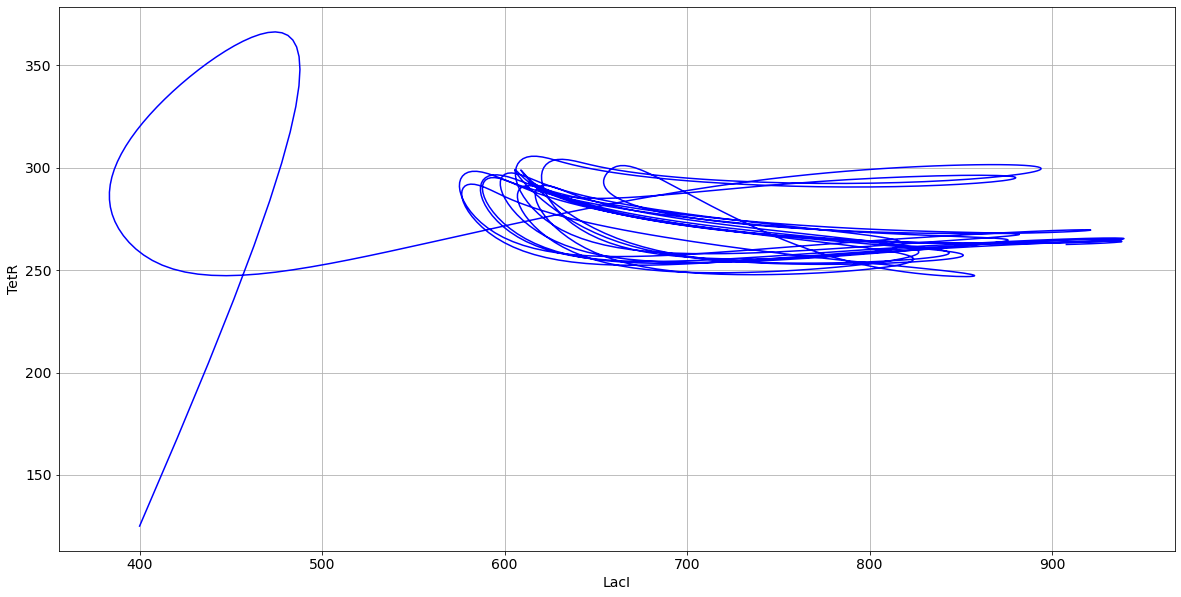

In [9]:
fig_x = 20
fig_y = 10

x3 = np.zeros(1440)
x4 = np.empty(1440)

with open('./data/deterministic/results0.json') as f:
    data = json.load(f)
    x3[:] = data['states']['LacI']
    x4[:] = data['states']['TetR']

plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 14

figure, ax = plt.subplots(1, sharex=True, figsize=(fig_x, fig_y))

ax.set_ylabel('TetR')
ax.set_xlabel('LacI')
ax.set_title('')
line, = ax.plot(x3, x4, color='b')
